In [ ]:
#resident
# %101% Single family - 4
# %104% Two family - 8
# %105% Three family - 12
# %111% 4-8 units -24
# %112% >8 units  -40
# %121% Boarding house

#Commercial

#Office

In [ ]:
#'Cemetery','Charitable/Religious','Government Operations',
#设施可用 -'Health','Higher Education','Education'，'Mixed Use Education'，'Privately-Owned Open Space'，'Public Open Space'，'Transportation'，Utilty
#空置 - 'Vacant Commercial'，'Vacant Industrial'，'Vacant Residential'

#resident
#'Assisted Living/Boarding House'
#'Education Residential'，'Residential'
#'Mixed Use Residential'

#Local business
#'Commercial'
#'Mixed Use Commercial'

#Industry group
#'Industrial'
#'Office'
#'Office/R&D'

In [2]:
import geopandas as gpd
import pandas as pd

try:
    apply = apply
except NameError:
    def apply(f,*args,**kw):
        return f(*args,**kw)

In [12]:
#读取数据
land_shp = 'E:\jupyter_notebook\Socity\Data\Dataresoures/CDD_LandUseKD.shp'
building_shp = 'E:\jupyter_notebook\Socity\Data\Dataresoures/BASEMAP_BuildingsKD.shp'
boundary_shp ='E:\jupyter_notebook\Socity\Data\Dataresoures/kendallsquare.shp'

#建筑与地块裁切
land_data = gpd.read_file(land_shp)
building_data = gpd.read_file(building_shp)
boundary_data =gpd.read_file(boundary_shp)
building_data = building_data.rename(columns={'Shape_area': 'Building_floor_area'})

#land_data.head()
#land_data.plot(markersize=.5);
print(land_data)

         ML MAP  LOT         Location  LandArea LUCode           LUDesc  \
0     16-33  16   33     270 THIRD ST   17436.0    013     MULTIUSE-RES   
1     47-85  47   85  84 WADSWORTH ST   33621.0    390     COM-DEV-LAND   
2    48-157  48  157      314 MAIN ST   43430.0    340       GEN-OFFICE   
3      47-4  47    4      180 MAIN ST   30450.0    942  Private College   
4     47-80  47   80   46 MEMORIAL DR  123273.0    942  Private College   
..      ...  ..  ...              ...       ...    ...              ...   
165   16-35  16   35     161 FIRST ST   14921.0    013     MULTIUSE-RES   
166  44-107  44  107       88 AMES ST   14743.0    112      >8-UNIT-APT   
167  44-104  44  104   80-90 Broadway   41170.0    346       INV-OFFICE   
168  44-105  44  105   355 Man Street   48814.0    346       INV-OFFICE   
169   44-95  44   95      70 Broadway   31757.0    336      PARKING-GAR   

                  Category  ExistUnits MixedUseTy GQLodgingH GradStuden  \
0    Mixed Use Residenti

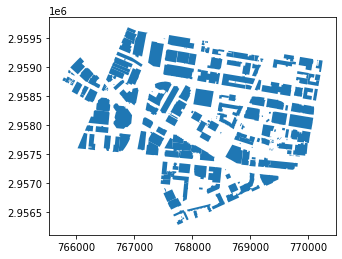

In [4]:
building_data.head()
building_data.plot(markersize=.5);

In [10]:
# 按地块和用地类型分组，并计算建筑面积总和
groupedLandBuilding_data = gpd.sjoin(land_data, building_data, op='intersects')
#计算建筑面积
groupedLandBuilding_data['building_area'] = groupedLandBuilding_data['TOP_GL'] /3* groupedLandBuilding_data['Building_floor_area']

print(groupedLandBuilding_data)

         ML MAP  LOT         Location  LandArea LUCode           LUDesc  \
0     16-33  16   33     270 THIRD ST   17436.0    013     MULTIUSE-RES   
1     47-85  47   85  84 WADSWORTH ST   33621.0    390     COM-DEV-LAND   
3      47-4  47    4      180 MAIN ST   30450.0    942  Private College   
1     47-85  47   85  84 WADSWORTH ST   33621.0    390     COM-DEV-LAND   
2    48-157  48  157      314 MAIN ST   43430.0    340       GEN-OFFICE   
..      ...  ..  ...              ...       ...    ...              ...   
167  44-104  44  104   80-90 Broadway   41170.0    346       INV-OFFICE   
168  44-105  44  105   355 Man Street   48814.0    346       INV-OFFICE   
167  44-104  44  104   80-90 Broadway   41170.0    346       INV-OFFICE   
168  44-105  44  105   355 Man Street   48814.0    346       INV-OFFICE   
168  44-105  44  105   355 Man Street   48814.0    346       INV-OFFICE   

                  Category  ExistUnits MixedUseTy  ... TOP_SL ELEV_GL TOP_GL  \
0    Mixed Use Resi

D:\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3357: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
<ipython-input-10-a53c014d2002>:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: PROJCS["NAD83 / Massachusetts Mainland (ftUS)",GEO ...
Right CRS: COMPD_CS["NAD83 / Massachusetts Mainland (ftUS) +  ...

  groupedLandBuilding_data = gpd.sjoin(land_data, building_data, op='intersects')


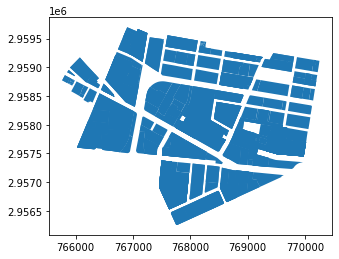

In [11]:
groupedLandBuilding_data.plot(markersize=.5);

# 包含地理位置信息的角色

D:\anaconda\lib\site-packages\geopandas\geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
D:\anaconda\lib\site-packages\geopandas\geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


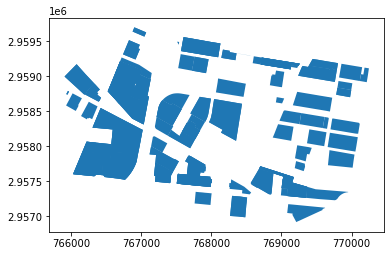

In [14]:
###各个Stakehold的总量
# Residents + Workforce (可直接用csv的信息联系到地块上)
#Resident_data = groupedLandBuilding_data[groupedLandBuilding_data['Category'].isin(['Assisted Living/Boarding House', 'Residential','Mixed Use Residential','Education Residential'])]
#Resident_data = groupedLandBuilding_data[groupedLandBuilding_data['Category'].isin([ 'Residential'])]
#Resident_data['residential_population'] = Resident_data['building_area'] / 70

#Local business owner
LocalBO_data = groupedLandBuilding_data[groupedLandBuilding_data['Category'].isin(['Commercial','Mixed Use Commercial'])]
LocalBO_data['Local_population'] = LocalBO_data['building_area'] / 40

#Industry group
LocalIG_data = groupedLandBuilding_data[groupedLandBuilding_data['Category'].isin(['Industrial','Office','Office/R&D'])]
LocalIG_data['Local_population'] = LocalIG_data['building_area'] / 200
LocalIG_data.plot(markersize=.5);